# ANUSHA S
# PGAA- 01 Online
# DL EXAM 2
# PART 1

# Problem Statement
A company named ‘XYZ’ sells a variety of health products for people of all ages. Company
management has decided to make key decisions on their logistics, supply and production for which
they want to check the sales figures for a certain set of years which will help them to invest their
bucks and time in taking decisions on key factors.
# GOAL
: As a Deep Learning Engineer in the company, you are given historical data with respect to
multiple regions of India and years (2005 to 2016). Your goal is to forecast sales for the years
2017 and 2018.
# DATA DESCRIPTION
Historical sales data of XYZ company from 2005 to 2016. Attribute
Information:
1. HQ - This attribute represents HeadQuarters of the company.
2. Country - This attribute represents the country of the outlet.
3. State_of_outlet - This attribute represents the state of the outlet.
4. City_of_outlet - This attribute represents the city of the outlet.
5. Month - This attribute represents month(ranging from 1 to 12 )
6. Day - This attribute represents day of the month(ranging from 1 to 31)
7. Year - This attribute represents year(ranging from 2005 to 2016)
8. Total_Sales - Target variable (total sales on particular day). This is basically the sale index
value. For eg: if value is 60 then you can assume total sale happened is 60*10,000 USD.


Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Embedding,SpatialDropout1D
import matplotlib.pyplot as plt
import datetime as dt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Reading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel("/content/drive/MyDrive/Imarticus Projects/EXAMS/DL EXAM 2/Datasets/LSTM/Sales Forecasting_Train Data.xlsx")
df.head()

Mounted at /content/drive


,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HQ               17536 non-null  object 
 1   Country          17536 non-null  object 
 2   State_of_outlet  0 non-null      float64
 3   City_of_outlet   17536 non-null  object 
 4   Month            17536 non-null  float64
 5   Day              17536 non-null  float64
 6   Year             17536 non-null  float64
 7   Total_Sales      17536 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(17536, 8)

It is found that there is no data in State-of- Outlet column hence drop it

In [5]:
date=pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))

In [6]:
df['date']=date
df.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales,date
0,Asia,India,NaN,Bombay (Mumbai),1.0,1.0,2005.0,72.2,2005-01-01
1,Asia,India,NaN,Bombay (Mumbai),1.0,2.0,2005.0,72.7,2005-01-02
2,Asia,India,NaN,Bombay (Mumbai),1.0,3.0,2005.0,74.3,2005-01-03
3,Asia,India,NaN,Bombay (Mumbai),1.0,4.0,2005.0,78.9,2005-01-04
4,Asia,India,NaN,Bombay (Mumbai),1.0,5.0,2005.0,81.5,2005-01-05


In [7]:
df= df.drop(['Month'],axis=1)
df=df.drop(['Year'],axis=1)
df=df.drop(['Day'],axis=1)
df=df.drop(['State_of_outlet'], axis = 1)
df.head()

,HQ,Country,City_of_outlet,Total_Sales,date
0,Asia,India,Bombay (Mumbai),72.2,2005-01-01
1,Asia,India,Bombay (Mumbai),72.7,2005-01-02
2,Asia,India,Bombay (Mumbai),74.3,2005-01-03
3,Asia,India,Bombay (Mumbai),78.9,2005-01-04
4,Asia,India,Bombay (Mumbai),81.5,2005-01-05


In [8]:
df.describe()

,Total_Sales
count,17536.000000
mean,80.117963
std,13.315486
min,-99.000000
25%,77.500000
50%,82.600000
75%,86.100000
max,102.500000


In [9]:
df.describe(include=object)

,HQ,Country,City_of_outlet
count,17536,17536,17536
unique,1,1,4
top,Asia,India,Bombay (Mumbai)
freq,17536,17536,4384


In [10]:
df.City_of_outlet.unique()

array(['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi'],
      dtype=object)

It is found that the dataset is all about sales of XYZ product in India only at 4 differnt cities- Mumbai, Calcutta, Chennai and Delhi

In [11]:
df=df.drop(['HQ'],axis=1)
df=df.drop(['Country'], axis=1)
df.head()

,City_of_outlet,Total_Sales,date
0,Bombay (Mumbai),72.2,2005-01-01
1,Bombay (Mumbai),72.7,2005-01-02
2,Bombay (Mumbai),74.3,2005-01-03
3,Bombay (Mumbai),78.9,2005-01-04
4,Bombay (Mumbai),81.5,2005-01-05


In [12]:
# label encode City_of_outlet
df= df.replace(to_replace =['Bombay (Mumbai)', 'Calcutta', 'Chennai (Madras)', 'Delhi'], 
                            value =['1','2','3','4'])

In [13]:
df.head()

,City_of_outlet,Total_Sales,date
0,1,72.2,2005-01-01
1,1,72.7,2005-01-02
2,1,74.3,2005-01-03
3,1,78.9,2005-01-04
4,1,81.5,2005-01-05


In [14]:
df.shape

(17536, 3)

Mumbai sales

In [15]:
df_mum= df[df["City_of_outlet"]=='1']
df_mum.shape

(4384, 3)

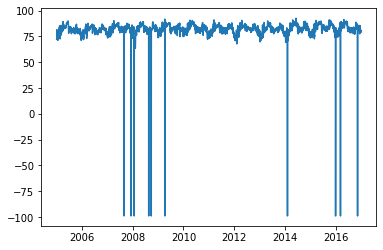

In [16]:
plt.plot(df_mum.date,df_mum.Total_Sales )

In [17]:
df_cal=df[df['City_of_outlet']=='2']
df_cal.shape

(4384, 3)

In [18]:
df_chen=df[df['City_of_outlet']=='3']
df_chen.shape

(4384, 3)

In [19]:
df_del=df[df['City_of_outlet']=='4']
df_del.shape

(4384, 3)

Lets study and forecast mumbai sales

In [20]:
import datetime as dt
start = dt.datetime(2005,1,1)
end = dt.datetime(2016,12,31)

In [21]:
from sklearn.preprocessing import MinMaxScaler
train_set = df_mum.iloc[0:2500:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 2500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
#Defining the LSTM Model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1)) #No activation function for output neuron as it's a regression problem


In [23]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [24]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
77/77 [==============================] - 17s 120ms/step - loss: 0.0995
Epoch 2/50
77/77 [==============================] - 9s 119ms/step - loss: 0.0176
Epoch 3/50
77/77 [==============================] - 9s 118ms/step - loss: 0.0171
Epoch 4/50
77/77 [==============================] - 9s 120ms/step - loss: 0.0187
Epoch 5/50
77/77 [==============================] - 9s 119ms/step - loss: 0.0174
Epoch 6/50
77/77 [==============================] - 9s 118ms/step - loss: 0.0195
Epoch 7/50
77/77 [==============================] - 9s 119ms/step - loss: 0.0176
Epoch 8/50
77/77 [==============================] - 11s 143ms/step - loss: 0.0177
Epoch 9/50
77/77 [==============================] - 9s 118ms/step - loss: 0.0179
Epoch 10/50
77/77 [==============================] - 9s 119ms/step - loss: 0.0180
Epoch 11/50
77/77 [==============================] - 9s 119ms/step - loss: 0.0170
Epoch 12/50
77/77 [==============================] - 9s 122ms/step - loss: 0.0169
Epoch 13/50
77/77 [====

In [25]:
#Fetching the test data and preprocessing
test_set = df_mum.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
X_test = []
y_test = []
for i in range(60, 2500):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
#Making predictions on the test data
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

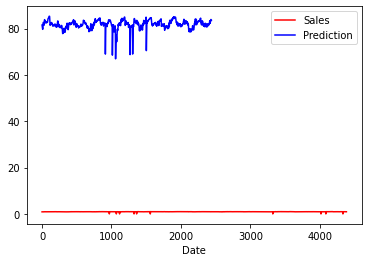

In [27]:
#Visualizing the prediction
plt.figure()
plt.plot(test_set_scaled, color = 'r', label = 'Sales')
plt.plot(predicted_sales, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error 
from statsmodels.tools.eval_measures import meanabs
#MAE for LSTM Model
predicted_sales = np.reshape(predicted_sales, (predicted_sales.shape[0], predicted_sales.shape[1], 1))
err_LSTM = meanabs(X_test, predicted_sales)
print('MSE with LSTM', err_LSTM)

MSE with LSTM [[80.83710705]
 [80.83708566]
 [80.83706299]
 [80.8370431 ]
 [80.83703497]
 [80.83703989]
 [80.83703753]
 [80.83702941]
 [80.83702534]
 [80.83702277]
 [80.83701144]
 [80.83700267]
 [80.83699026]
 [80.83698171]
 [80.8369693 ]
 [80.83696823]
 [80.83695625]
 [80.83694192]
 [80.83691882]
 [80.83689764]
 [80.83688695]
 [80.83687882]
 [80.83686278]
 [80.83683989]
 [80.83681978]
 [80.83679925]
 [80.836777  ]
 [80.83676481]
 [80.83675262]
 [80.83673615]
 [80.83671604]
 [80.83669529]
 [80.83668181]
 [80.83666791]
 [80.83665315]
 [80.83664524]
 [80.83664374]
 [80.83663968]
 [80.83663411]
 [80.8366324 ]
 [80.83663518]
 [80.83662898]
 [80.83662021]
 [80.83661486]
 [80.83661657]
 [80.83661444]
 [80.83660246]
 [80.83658962]
 [80.83657444]
 [80.83655518]
 [80.83653208]
 [80.83650278]
 [80.83648267]
 [80.8364647 ]
 [80.83644374]
 [80.83642834]
 [80.83641765]
 [80.83641807]
 [80.83641294]
 [80.83640011]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
from sklearn.preprocessing import MinMaxScaler
train_set = df_cal.iloc[0:1333:, 1:2].values # reduced the input for faster execution
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
40/40 [==============================] - 5s 119ms/step - loss: 0.0250
Epoch 2/50
40/40 [==============================] - 5s 118ms/step - loss: 0.0244
Epoch 3/50
40/40 [==============================] - 5s 117ms/step - loss: 0.0185
Epoch 4/50
40/40 [==============================] - 5s 119ms/step - loss: 0.0178
Epoch 5/50
40/40 [==============================] - 5s 119ms/step - loss: 0.0204
Epoch 6/50
40/40 [==============================] - 6s 149ms/step - loss: 0.0199
Epoch 7/50
40/40 [==============================] - 5s 118ms/step - loss: 0.0189
Epoch 8/50
40/40 [==============================] - 5s 117ms/step - loss: 0.0164
Epoch 9/50
40/40 [==============================] - 5s 119ms/step - loss: 0.0229
Epoch 10/50
40/40 [==============================] - 5s 120ms/step - loss: 0.0179
Epoch 11/50
40/40 [==============================] - 5s 118ms/step - loss: 0.0176
Epoch 12/50
40/40 [==============================] - 5s 118ms/step - loss: 0.0156
Epoch 13/50
40/40 [======

In [31]:
#Fetching the test data and preprocessing
test_set = df_cal.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
X_test = []
y_test = []
for i in range(60, 1333):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [32]:
#Making predictions on the test data
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

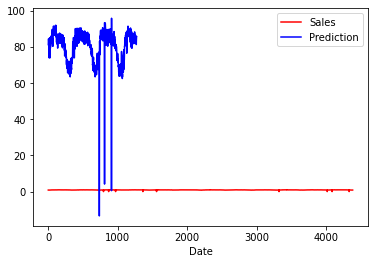

In [33]:
#Visualizing the prediction
plt.figure()
plt.plot(test_set_scaled, color = 'r', label = 'Sales')
plt.plot(predicted_sales, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [34]:
#MAE for LSTM Model
predicted_sales = np.reshape(predicted_sales, (predicted_sales.shape[0], predicted_sales.shape[1], 1))
err_LSTM = meanabs(X_test, predicted_sales)
print('MSE with LSTM', err_LSTM)

MSE with LSTM [[80.03149682]
 [80.03144666]
 [80.03137708]
 [80.03130063]
 [80.0312525 ]
 [80.03117888]
 [80.03111658]
 [80.03105712]
 [80.03097824]
 [80.03090907]
 [80.03087792]
 [80.03080754]
 [80.030723  ]
 [80.03065343]
 [80.03058506]
 [80.03046088]
 [80.03041477]
 [80.03033468]
 [80.0302558 ]
 [80.03018137]
 [80.03010856]
 [80.03008267]
 [80.03001512]
 [80.02996294]
 [80.0299233 ]
 [80.02982824]
 [80.02970527]
 [80.02961304]
 [80.02957259]
 [80.02951717]
 [80.02944072]
 [80.02935659]
 [80.0292862 ]
 [80.02918022]
 [80.02911874]
 [80.02904997]
 [80.02897029]
 [80.02887361]
 [80.02877006]
 [80.02877532]
 [80.02873729]
 [80.02871383]
 [80.02863374]
 [80.02856659]
 [80.028567  ]
 [80.02855931]
 [80.02853909]
 [80.02850915]
 [80.02849944]
 [80.02852574]
 [80.02851077]
 [80.02849338]
 [80.02852574]
 [80.02849095]
 [80.02846061]
 [80.02836272]
 [80.02833279]
 [80.02828748]
 [80.02825431]
 [80.02616826]]


In [35]:
train_set = df_chen.iloc[0:1333:, 1:2].values # reduced the input for faster execution
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
40/40 [==============================] - 5s 119ms/step - loss: 0.0079
Epoch 2/10
40/40 [==============================] - 6s 146ms/step - loss: 0.0078
Epoch 3/10
40/40 [==============================] - 5s 120ms/step - loss: 0.0082
Epoch 4/10
40/40 [==============================] - 5s 119ms/step - loss: 0.0081
Epoch 5/10
40/40 [==============================] - 5s 120ms/step - loss: 0.0083
Epoch 6/10
40/40 [==============================] - 5s 117ms/step - loss: 0.0093
Epoch 7/10
40/40 [==============================] - 5s 121ms/step - loss: 0.0093
Epoch 8/10
40/40 [==============================] - 5s 121ms/step - loss: 0.0073
Epoch 9/10
40/40 [==============================] - 5s 119ms/step - loss: 0.0085
Epoch 10/10
40/40 [==============================] - 5s 119ms/step - loss: 0.0085


In [36]:
#Fetching the test data and preprocessing
test_set = df_chen.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
X_test = []
y_test = []
for i in range(60, 1333):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

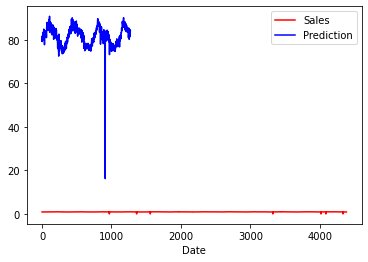

In [37]:
#Making predictions on the test data
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

#Visualizing the prediction
plt.figure()
plt.plot(test_set_scaled, color = 'r', label = 'Sales')
plt.plot(predicted_sales, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [38]:
#MAE for LSTM Model
predicted_sales = np.reshape(predicted_sales, (predicted_sales.shape[0], predicted_sales.shape[1], 1))
err_LSTM = meanabs(X_test, predicted_sales)
print('MSE with LSTM', err_LSTM)

MSE with LSTM [[80.89269445]
 [80.89265014]
 [80.89261589]
 [80.89258447]
 [80.89253532]
 [80.8925039 ]
 [80.89245838]
 [80.89241931]
 [80.89237298]
 [80.89233149]
 [80.89228596]
 [80.89225051]
 [80.89219935]
 [80.89216833]
 [80.89213369]
 [80.89209502]
 [80.89204949]
 [80.89201122]
 [80.89197577]
 [80.89194194]
 [80.89191293]
 [80.89188755]
 [80.89186378]
 [80.89183599]
 [80.89180779]
 [80.89178201]
 [80.89174897]
 [80.89171715]
 [80.89169419]
 [80.89167002]
 [80.89165108]
 [80.89164907]
 [80.89162852]
 [80.8915975 ]
 [80.89157333]
 [80.89153506]
 [80.89150566]
 [80.89147343]
 [80.89144765]
 [80.89142267]
 [80.89139004]
 [80.89135983]
 [80.89133001]
 [80.89132438]
 [80.89130625]
 [80.89128449]
 [80.89125589]
 [80.89123817]
 [80.89121722]
 [80.89120473]
 [80.89118701]
 [80.8911725 ]
 [80.89116042]
 [80.89115518]
 [80.89114753]
 [80.89114108]
 [80.89113262]
 [80.89112134]
 [80.89110644]
 [80.8910867 ]]


In [39]:
train_set = df_del.iloc[0:1333:, 1:2].values # reduced the input for faster execution
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
40/40 [==============================] - 5s 134ms/step - loss: 0.0192
Epoch 2/10
40/40 [==============================] - 5s 120ms/step - loss: 0.0168
Epoch 3/10
40/40 [==============================] - 5s 119ms/step - loss: 0.0162
Epoch 4/10
40/40 [==============================] - 5s 120ms/step - loss: 0.0163
Epoch 5/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0178
Epoch 6/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0166
Epoch 7/10
40/40 [==============================] - 5s 120ms/step - loss: 0.0155
Epoch 8/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0162
Epoch 9/10
40/40 [==============================] - 5s 117ms/step - loss: 0.0164
Epoch 10/10
40/40 [==============================] - 5s 118ms/step - loss: 0.0158


In [40]:
#Fetching the test data and preprocessing
test_set = df_del.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(test_set)
X_test = []
y_test = []
for i in range(60, 1333):
    X_test.append(test_set_scaled[i-60:i, 0])
    y_test.append(test_set_scaled[i, 0]) 
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

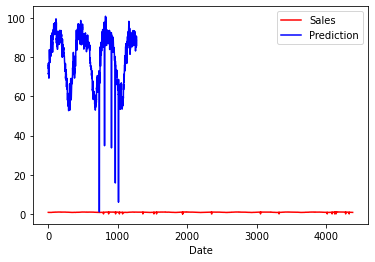

In [41]:
#Making predictions on the test data
predicted_sales = model.predict(X_test)
predicted_sales = sc.inverse_transform(predicted_sales)

#Visualizing the prediction
plt.figure()
plt.plot(test_set_scaled, color = 'r', label = 'Sales')
plt.plot(predicted_sales, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [42]:
#MAE for LSTM Model
predicted_sales = np.reshape(predicted_sales, (predicted_sales.shape[0], predicted_sales.shape[1], 1))
err_LSTM = meanabs(X_test, predicted_sales)
print('MSE with LSTM', err_LSTM)

MSE with LSTM [[79.41729016]
 [79.41720284]
 [79.41710109]
 [79.41697438]
 [79.4168508 ]
 [79.41671591]
 [79.41657518]
 [79.41643717]
 [79.41629527]
 [79.41618143]
 [79.41608904]
 [79.41598417]
 [79.41586604]
 [79.41575767]
 [79.41564695]
 [79.41553116]
 [79.41543643]
 [79.41533273]
 [79.41521889]
 [79.41508596]
 [79.41495263]
 [79.41482359]
 [79.41468909]
 [79.41453588]
 [79.41440918]
 [79.41428053]
 [79.41415344]
 [79.41402557]
 [79.41391563]
 [79.41379711]
 [79.41369458]
 [79.41358932]
 [79.41345561]
 [79.41331487]
 [79.41318271]
 [79.41308447]
 [79.41298272]
 [79.412872  ]
 [79.4127761 ]
 [79.41270554]
 [79.41263926]
 [79.4125687 ]
 [79.41250359]
 [79.41246422]
 [79.41239288]
 [79.41231062]
 [79.41221511]
 [79.41212856]
 [79.41204786]
 [79.41197886]
 [79.41189075]
 [79.4117851 ]
 [79.41168179]
 [79.41156445]
 [79.41146855]
 [79.41137732]
 [79.4113091 ]
 [79.41124399]
 [79.41117382]
 [79.41110053]]


#RESULT
Obtained MAE for Mumbai sales forecast is 80.83

Obtained MAE for Calcutta sales forecast is 80.03

Obtained MAE for Chennai sales forecast is 80.89 (execution with less number of epochs)

Obtained MAE for Delhi sales forecast is 79.41 (execution with less number of epochs)